In [42]:
import numpy as np
import matplotlib.pyplot as plt


### Generate Data



In [43]:
x = np.random.uniform(0, 1, (100, 2))

In [44]:
crosses = x[(x[:, 0] * 3 - x[:, 1] * 2 + 0.1) > 0.5]
circles = x[(x[:, 0] * 3 - x[:, 1] * 2 + 0.1) <= 0.5]

In [45]:
crosses.shape

(61, 2)

In [46]:
circles.shape

(39, 2)

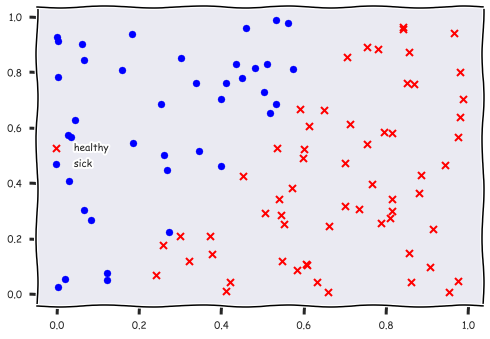

In [52]:
plt.xkcd()
plt.scatter(crosses[:, 0], crosses[:, 1], marker='x', c='r', label='healthy')
plt.scatter(circles[:, 0], circles[:, 1], marker='o', c='b', label='sick')
plt.legend()

### Calculate nearest neighbours

In [48]:
k = 5
test = [0.35, 0.3]
distances = []

for i, p in enumerate(x):
    dist = (p[0] - test[0])**2 + (p[1] - test[1])**2
    distances.append((i, dist))

distances = sorted(distances, key=lambda x: x[1])
nn = [d[0] for d in distances][0:k]

In [49]:
nn

[14, 78, 95, 65, 8]

### Predict 

In [50]:
crosses_count = 0
circles_count = 0

for i in nn:
    d = x[i]
    is_cross = (d[0] * 3 - d[1] * 2 + 0.1) > 0.5
    if is_cross:
        crosses_count += 1
    else:
        circles_count += 1

if crosses_count > circles_count:
    marker = 'x'
else:
    marker = 'o'


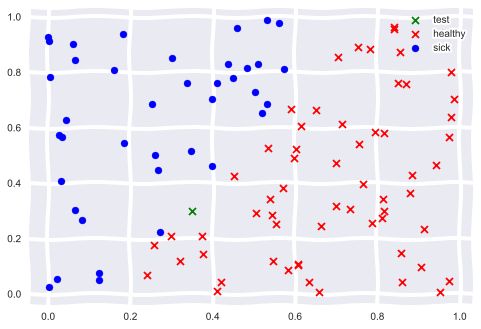

In [51]:
plt.style.use('seaborn')

plt.scatter(test[0], test[1], marker=marker, c='g', label='test')
plt.scatter(crosses[:, 0], crosses[:, 1], marker='x', c='r', label='healthy')
plt.scatter(circles[:, 0], circles[:, 1], marker='o', c='b', label='sick')
plt.legend()

## Scikit-learn demo

In [69]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [70]:
k = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [71]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

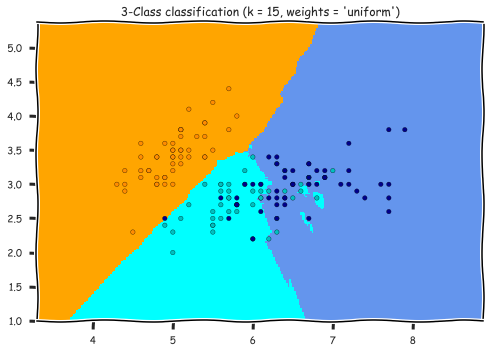

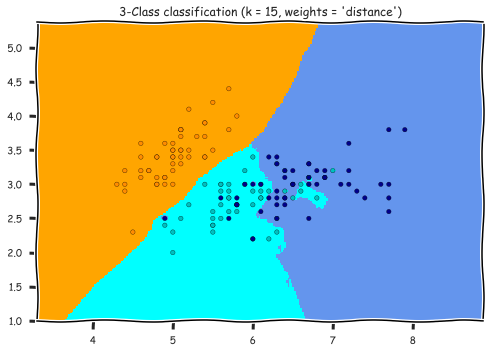

In [66]:
for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, weights))
plt.show()

### Neighborhood Component Analysis

https://scikit-learn.org/stable/modules/neighbors.html#neighborhood-components-analysis

In [72]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

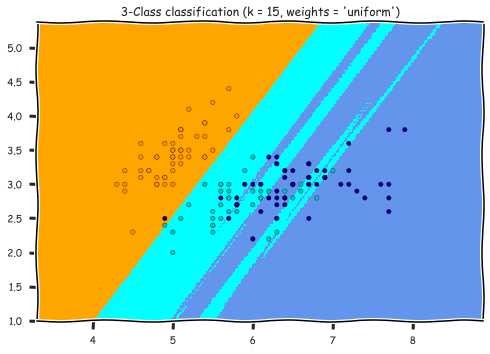

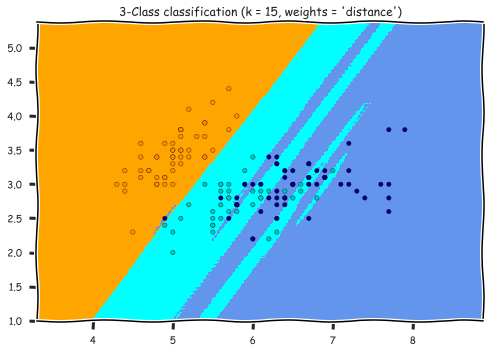

In [74]:
for weights in ["uniform", "distance"]:
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = neighbors.KNeighborsClassifier(k, weights=weights)
    clf = Pipeline([('nca', nca), ('knn', knn)])
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, weights))
plt.show()